<a href="https://colab.research.google.com/github/Kovibordy/parsi/blob/main/task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Часть 2 - анализ текстовых данных

Провести аналитику текстовых данных.

1. Токенезировать и лемматизировать полученные текстовые данные полученные из 1 части задания

- Токенизация - разделение слов на предложения
- Лемматизация - перевод слов в начальную форму

2. Посчитать наиболее встречающиеся пары подлежащих и сказуемых
3. Посчитать самые популлярные слова (исключая стоп-слова, словарь стоп слов можно найти в nltk, либо отбросить по частям речи)
4. Вывести статистику (по убыванию, наиболее встречающеся пары и самые популярные слова за исключением стоп-слов)

In [10]:
from ipmarkup import show_dep_ascii_markup as show_markup
for content in articles:
    text = article.get('content')

    doc = Doc(text)
    doc.segment(segmenter)
    doc.parse_syntax(syntax_parser)
    doc.tag_morph(morph_tagger)
    for sentence in doc.sents: # получаем предложения
        sentence.syntax.print()
#         for token in sentence.tokens: # получаем токены
#             print(token)y

Выходные данные были обрезаны до нескольких последних строк (5000).
│       └──►┌─└─ анализа          conj
│         ┌─└──► сведений         nmod
│         │   ┌► ,                punct
│       ┌─└──►└─ относящихся      acl
│       │     ┌► к                case
│       └──►┌─└─ предпочтениям    obl
│     ┌─────└──► Пользователей    nmod
│     │ ┌──────► (                punct
│     │ │ ┌──►┌─ далее            advmod
│     │ │ │   └► –                punct
│     │ │ │ ┌──► «                punct
│     │ │ │ │ ┌► Рекомендательные amod
│     └►└─└─└─└─ технологии       parataxis
│         │ └──► »                punct
│         └────► )                punct
└──────────────► .                punct
                        ┌► Правила       nsubj
┌───┌─┌─────────┌───┌─┌─└─ являются      
│   │ │         │   │ │ ┌► неотъемлемой  amod
│   │ │         │   │ └►└─ частью        xcomp
│   │ │         │ ┌►│   ┌─ Условий       nmod
│ ┌─│ │         │ │ │ ┌─└► использования nmod
│ │ │ │         │ │ │ 

In [16]:
for content in articles:
  for token in sentence.tokens: # получаем токены
    print(token)

Выходные данные были обрезаны до нескольких последних строк (5000).
DocToken(start=795, stop=802, text='Ресурса', id='3_33', head_id='3_6', rel='nmod', pos='PROPN', feats=<Inan,Gen,Masc,Sing>)
DocToken(start=802, stop=803, text='.', id='3_34', head_id='3_2', rel='punct', pos='PUNCT')
DocToken(start=585, stop=592, text='Правила', id='3_1', head_id='3_2', rel='nsubj', pos='NOUN', feats=<Inan,Nom,Neut,Plur>)
DocToken(start=593, stop=601, text='являются', id='3_2', head_id='3_0', rel='root', pos='VERB', feats=<Imp,Ind,Plur,3,Pres,Fin,Mid>)
DocToken(start=602, stop=614, text='неотъемлемой', id='3_3', head_id='3_4', rel='amod', pos='ADJ', feats=<Ins,Pos,Fem,Sing>)
DocToken(start=615, stop=621, text='частью', id='3_4', head_id='3_2', rel='xcomp', pos='NOUN', feats=<Inan,Ins,Fem,Sing>)
DocToken(start=622, stop=629, text='Условий', id='3_5', head_id='3_12', rel='nmod', pos='PROPN', feats=<Inan,Gen,Neut,Plur>)
DocToken(start=630, stop=643, text='использования', id='3_6', head_id='3_5', rel='nmod

## лемма

In [24]:
for content in articles:
  for token in sentence.tokens:
    token.lemmatize(morph_vocab)
  lemmatized = {_.text: _.lemma for _ in sentence.tokens}
  print(lemmatized.items())

dict_items([("'", "'"), (',', ','), ('category', 'category'), (':', ':'), ('N', 'n'), ('/', '/'), ('A', 'a'), ('created_date', 'created_date'), ('Unknown', 'unknown'), ('url', 'url'), ('https', 'https'), ('lenta', 'lenta'), ('.', '.'), ('ru', 'ru'), ('info', 'info'), ('posts', 'posts'), ('recommendation_rules', 'recommendation_rules'), ('}', '}')])
dict_items([("'", "'"), (',', ','), ('category', 'category'), (':', ':'), ('N', 'n'), ('/', '/'), ('A', 'a'), ('created_date', 'created_date'), ('Unknown', 'unknown'), ('url', 'url'), ('https', 'https'), ('lenta', 'lenta'), ('.', '.'), ('ru', 'ru'), ('info', 'info'), ('posts', 'posts'), ('recommendation_rules', 'recommendation_rules'), ('}', '}')])
dict_items([("'", "'"), (',', ','), ('category', 'category'), (':', ':'), ('N', 'n'), ('/', '/'), ('A', 'a'), ('created_date', 'created_date'), ('Unknown', 'unknown'), ('url', 'url'), ('https', 'https'), ('lenta', 'lenta'), ('.', '.'), ('ru', 'ru'), ('info', 'info'), ('posts', 'posts'), ('recommen

## разделение подлежащего и сказуемого

In [18]:
nsubj = ''
root = ''
pairs = {}
for content in articles:
  nsubj = ''
  root = ''
  for token in sentence.tokens:
    token.lemmatize(morph_vocab)

    if token.rel == "nsubj":
      nsubj = token.lemma
    if token.rel == 'root':
      root = token.lemma
    if nsubj and root:
      pairs[nsubj] = root

print(pairs)

{'правило': 'являться', 'данные': 'являться'}


In [19]:
all_pairs = []
for article in articles:
  doc = Doc(str(article))
  doc.segment(segmenter)
  doc.parse_syntax(syntax_parser)
  doc.tag_morph(morph_tagger)
  for sentence in doc.sents:
    nsubj = ''
    root = ''
    for token in sentence.tokens:
      token.lemmatize(morph_vocab)

      if token.rel == "nsubj":
        nsubj = token.lemma
      if token.rel == 'root':
        root = token.lemma
      if nsubj and root:
        all_pairs.append((nsubj, root))

## наиболее встречающиеся пары подлежащих и сказуемых

In [20]:
from collections import Counter


pairs_count = Counter(all_pairs)
pairs_count

Counter({('преобразовать', 'дать'): 15,
         ('они', 'дать'): 40,
         ('они', 'вспомнить'): 10,
         ('они', 'жар-птице'): 13,
         ('ты', 'проверить'): 4,
         ('она', 'помочь'): 12,
         ('что', 'вспомнить'): 3,
         ('это', 'вспомнить'): 17,
         ('кот', 'вспомнить'): 5,
         ('кто', 'успеть'): 16,
         ('потенциал', 'успеть'): 4,
         ('город', 'просыпаться'): 2,
         ('президент', 'просыпаться'): 3,
         ('отметить', 'смочь'): 6,
         ('ты', 'мочь'): 13,
         ('вы', 'выражать'): 72,
         ('реакция', 'выражать'): 1,
         ('реакция', 'помогать'): 32,
         ('вы', 'получить'): 14,
         ('вы', 'мочь'): 34,
         ('организатор', 'организатор'): 16,
         ('программа', 'действовать'): 9,
         ('россия', 'нанести'): 10,
         ('ракета', 'мочь'): 39,
         ('удар', 'мочь'): 16,
         ('удар', 'быть'): 16,
         ('житель', 'удар'): 19,
         ('подпольщик', 'наноситься'): 1,
         ('подпо

In [21]:
pairs_count.most_common(10)

[(('он', 'стать'), 268),
 (('она', 'стать'), 175),
 (('я', 'думать'), 168),
 (('он', 'сказать'), 136),
 (('речь', 'идти'), 136),
 (('он', 'призвать'), 118),
 (('я', 'мочь'), 117),
 (('он', 'знать'), 102),
 (('он', 'мочь'), 102),
 (('он', 'заявить'), 101)]

## Самые популярные слова (без стоп-слов, цифр и знаков пунктуации)

In [22]:
popular_words = []
delete_punctuation = set(string.punctuation + '«»—' + string.digits + 'n')
stop_words = set(stopwords.words('russian'))
for article in articles:
  doc = Doc(str(article))
  doc.segment(segmenter)
  doc.parse_syntax(syntax_parser)
  doc.tag_morph(morph_tagger)
  for sentence in doc.sents:
    for token in sentence.tokens:
      token.lemmatize(morph_vocab)
      if token.lemma not in delete_punctuation and token.lemma not in stop_words:
        popular_words.append(token.lemma)

filtered_count = Counter(popular_words)
filtered_count.most_common(20)

[('год', 977),
 ('это', 749),
 ('который', 630),
 ('фото', 442),
 ('весь', 424),
 ('россия', 359),
 ('свой', 336),
 ('стать', 331),
 ('мочь', 308),
 ('человек', 259),
 ('время', 235),
 ('страна', 230),
 ('российский', 223),
 ('первый', 197),
 ('слово', 197),
 ('украина', 196),
 ('также', 192),
 ('военный', 171),
 ('ru', 167),
 ('новый', 167)]

3 самых популярных слова - год, это, который

### Статистика

## самых популярных пар Подлежащее + Сказуемое

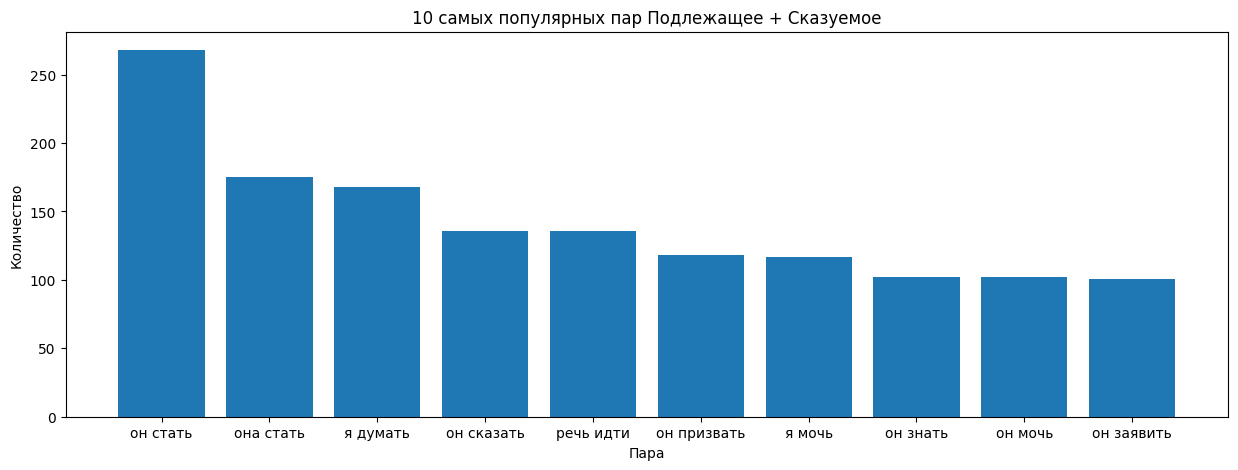

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DataFrame
data = DataFrame()
pair = [(i[0][0] + ' ' + i[0][1]) for i in pairs_count.most_common(10)]
count = [i[1] for i in pairs_count.most_common(10)]

data["Pair"] = pair
data["Count"] = count
fig, ax = plt.subplots(figsize=(15, 5))

plt.bar(data["Pair"], data["Count"])
plt.title("10 самых популярных пар Подлежащее + Сказуемое")
plt.ylabel("Количество")
plt.xlabel("Пара")
plt.show()

### самые популярные слова

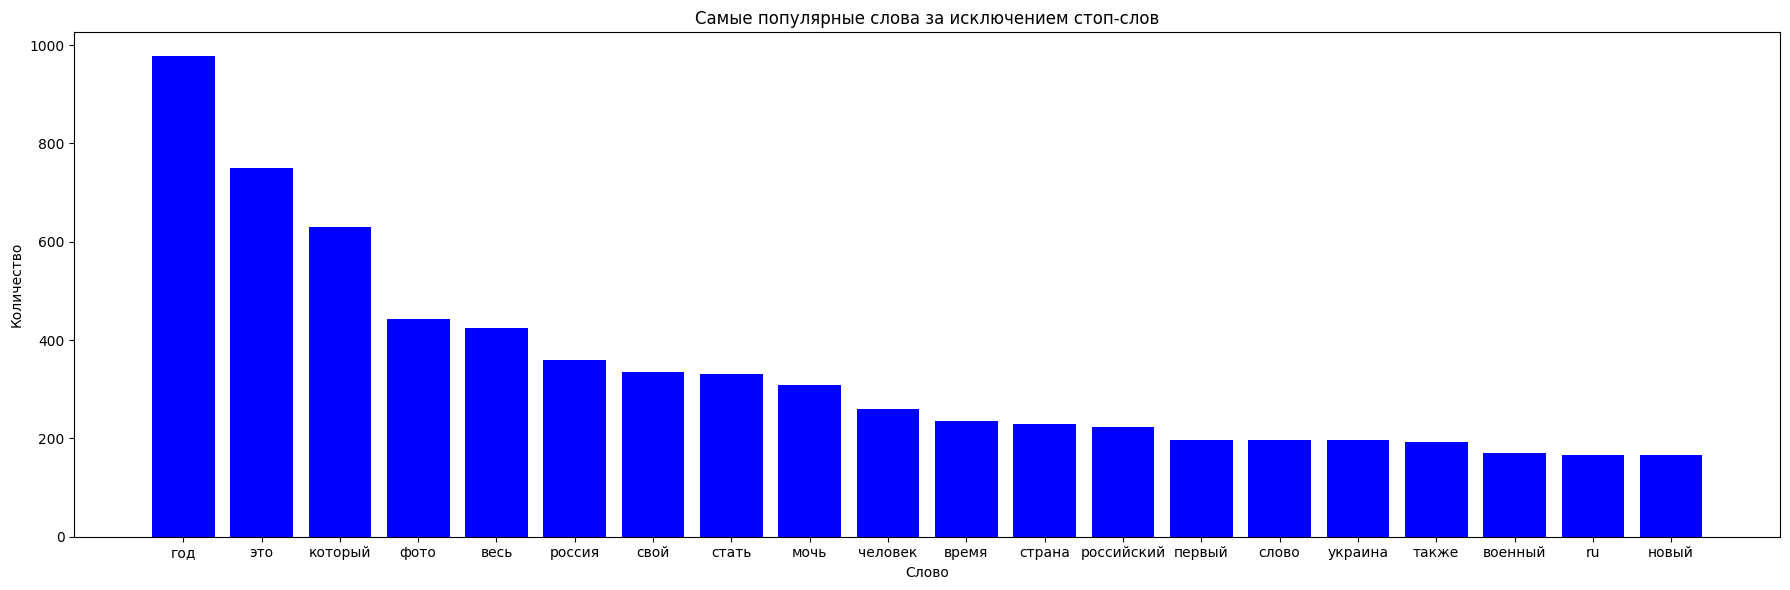

In [29]:
words = [pair[0] for pair in filtered_count.most_common(20)]
counter = [pair[1] for pair in filtered_count.most_common(20)]

plt.figure(figsize=(18, 6))
plt.bar(words, counter, color = 'blue')
plt.title("Самые популярные слова за исключением стоп-слов")
plt.ylabel("Количество")
plt.xlabel("Слово")
plt.tight_layout()
plt.show()